# Filtering (smoothing) the COVID-19 data

Reference: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
flist=glob.glob('data/covid19/*.csv')
flist=sorted(flist)
flist[-5:]

['data/covid19/08-01-2020.csv',
 'data/covid19/08-02-2020.csv',
 'data/covid19/08-03-2020.csv',
 'data/covid19/08-04-2020.csv',
 'data/covid19/08-05-2020.csv']

In [3]:
df_list = []
for f in flist:
    df = pd.read_csv(f)
    ca = df[df['Province_State']=='California'][['Province_State', 'Last_Update', 'Confirmed', 'Deaths']]
    df_list.append(ca)

In [4]:
df2 = pd.concat(df_list)
df2[-5:]

,Province_State,Last_Update,Confirmed,Deaths
5,California,2020-08-02 04:35:05,506613,9345
5,California,2020-08-03 04:34:47,512175,9396
5,California,2020-08-04 04:42:12,516851,9441
5,California,2020-08-05 04:34:56,526685,9684
5,California,2020-08-06 04:35:14,530606,9808


In [5]:
date_of_first_day = df2.iloc[0]['Last_Update'].split()[0]

In [6]:
c = df2['Confirmed']
c.head()

4    22795
5    23931
5    25356
5    26686
5    27677
Name: Confirmed, dtype: int64

Text(0, 0.5, 'Number of confirmed cases')

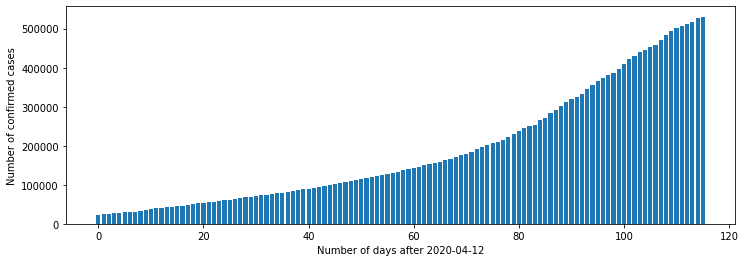

In [7]:
# visualize the number of confirmed cases
plt.figure(figsize=(12,4))
plt.bar(np.arange(c.shape[0]), c)
plt.xlabel('Number of days after {}'.format(date_of_first_day))
plt.ylabel('Number of confirmed cases')

In [8]:
# compute the daily values: daily(n) = f(n+1) - f(n)
c2 = c[1:].values - c[:-1].values
c2

array([ 1136,  1425,  1330,   991,  1480,  1334,   940,  2255,  1779,
        1879,  2217,  1794,  1013,  1190,  1408,  1198,  2583,  1383,
        1896,  1321,  1556,   981,  2572,  2160,  1532,  1631,  2779,
        1042,  1729,  1649,  1820,  2073,  1822,  2032,  1441,  1291,
        2295,  2245,  2034,  2221,  2287,  1481,  2380,  2987,  1663,
        2763,  2809,  3273,  2056,  2782,  2482,  2133,  2820,  3570,
        2855,  2022,  3201,  2825,  3074,  3662,  3282,  3359,  2282,
        3426,  3235,  3837,  4288,  3776,  4351,  3333,  6219,  6712,
        4448,  5187,  5732,  3740,  4712,  8350,  7586,  7449,  7869,
        3964,  2381, 11786,  6354, 12977,  8548,  9924,  8401,  7876,
        5782,  8814, 12854,  8674,  9821,  8553,  7486,  6161, 10964,
       11435, 11981,  9487,  9412,  6267,  5836,  5833, 12641, 14151,
        8021,  7622,  6057,  5562,  4676,  9834,  3921])

In [9]:
# for example, the daily values for the first two days
c.iloc[1] - c.iloc[0], c.iloc[2]-c.iloc[1]

(1136, 1425)

Text(0, 0.5, 'Number of daily confirmed cases')

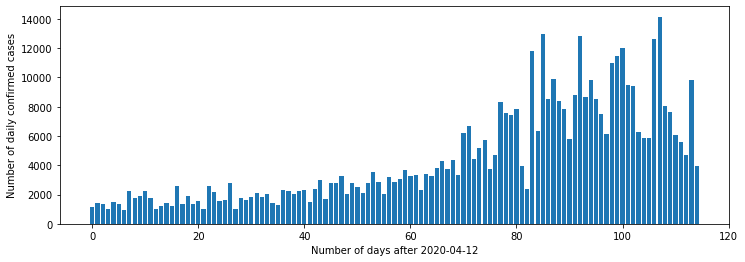

In [10]:
plt.figure(figsize=(12,4))
plt.bar(np.arange(c2.shape[0]), c2)
plt.xlabel('Number of days after {}'.format(date_of_first_day))
plt.ylabel('Number of daily confirmed cases')

In [11]:
# average the past 7 days
cavg = (c2[0:-7] + c2[1:-6] + c2[2:-5] + c2[3:-4] + c2[4:-3] + c2[5:-2] + c2[6:-1])/7

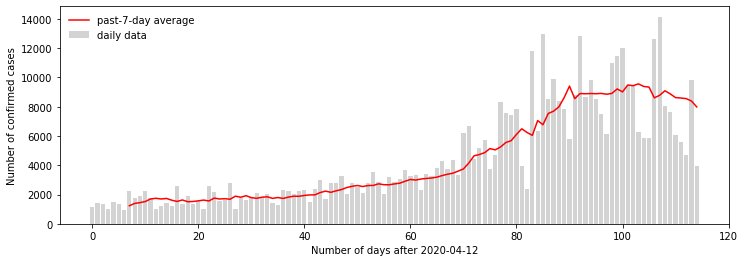

In [13]:
plt.figure(figsize=(12,4))
plt.bar(np.arange(c2.shape[0]), c2, label='daily data', color='lightgray')
plt.plot(np.arange(cavg.shape[0])+7, cavg, 'r-', label='past-7-day average')
plt.ylabel('Number of confirmed cases')
plt.xlabel('Number of days after {}'.format(date_of_first_day))
plt.legend(frameon=False)

## Exercise

1. Plot the 7-day average of the number of daily deaths.

2. Instead of using the average of the past 7 days, filter the data such that the present day average is computed from the average of the past 3 days, the present day, and the next 3 days (i.e. a 7-day window). Plot your results with the results of past-7-day-average and the daily data.

3. Organize your code that the size of the averaging window is an input parameter, so you can easily plot the results of, say, 5-day or 14-day averages.